# Example Flattening the Curve

The top example shows no suppression wihle the bottom shows a 50% suppression policy.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


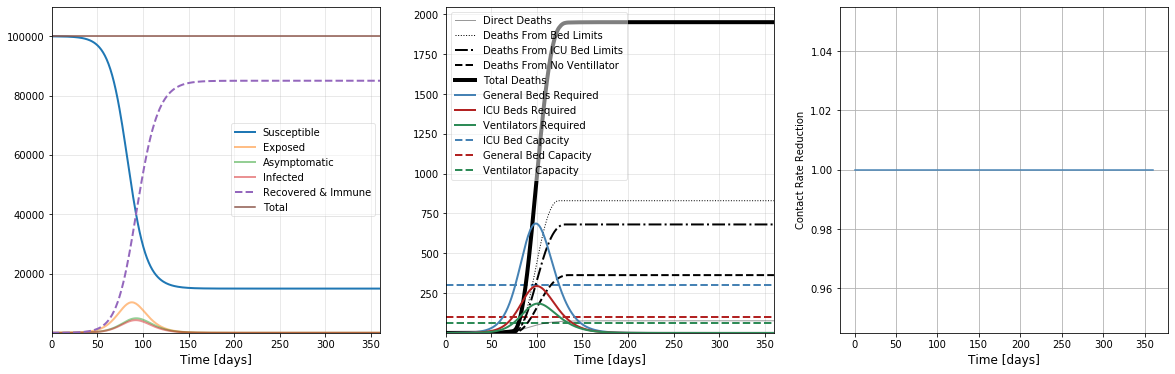

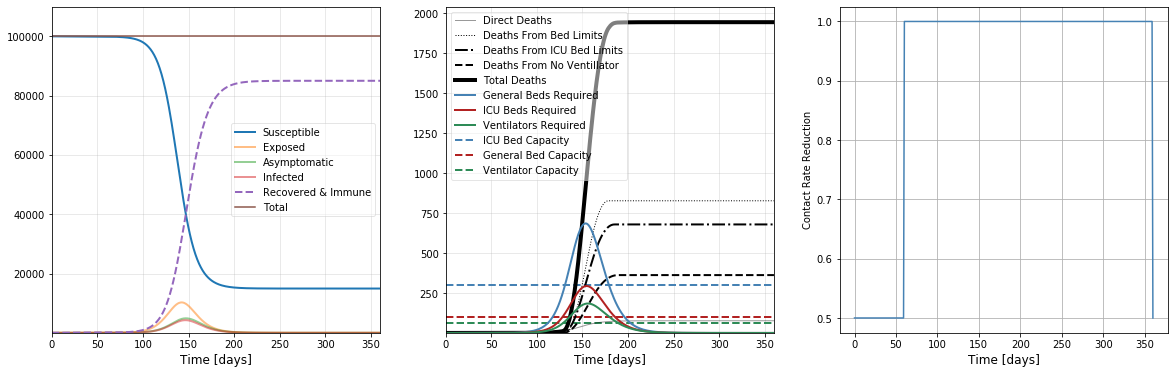

In [4]:
%load_ext autoreload
%autoreload 2
import sys

import numpy as np
from pyseir.models.seir_model import SEIRModel
from pyseir.models.suppression_policies import generate_triggered_suppression_model
import matplotlib.pyplot as plt

n_days = 360
t_list = np.linspace(0, n_days, n_days)
suppression_policy = generate_triggered_suppression_model(t_list=t_list, lockdown_days=0, open_days=0, reduction=1)


model = SEIRModel(
    N=100000,
    A_initial=5,
    I_initial=5,
    t_list=t_list,
    suppression_policy=suppression_policy)

model.run()
model.plot_results(y_scale='linear')


suppression_policy = generate_triggered_suppression_model(t_list=t_list, lockdown_days=60, open_days=300, reduction=.5)
model = SEIRModel(
    N=100000,
    A_initial=5,
    I_initial=5,
    t_list=t_list,
    suppression_policy=suppression_policy)

model.run()
model.plot_results(y_scale='linear')

# Optimal Parametric Policies
Optimize a peicewise discontinuous set of suppression models (between bounds) to minimize the total death count.

In [11]:
from pyseir.models import suppression_policies
from pyseir.optimization import PolicyOptimizer

N_piecewise_segments = 6

# Start with an initial policy of 50% suppression indefinitely.
# The 0.5 first parameter for this policy is how to increase the intervals as a power-law between the first segments.
x0 = [.5] + list(0.5 * np.ones(N_piecewise_segments))

# Min/max levels of suppression acheivable. 0.2 is extreme isolation, 2 = chicken pox parties.
min_suppression_level, max_suppression_level = 2, 0.4
optimization_bounds = [(.1, 3)] + [(max_suppression_level, min_suppression_level)] * N_piecewise_segments
print(optimization_bounds)

optimizer = PolicyOptimizer(
    seir_model_class=SEIRModel,
    seir_model_args=dict(
         N=100000,
         A_initial=5,
         I_initial=5,
         t_list=np.linspace(0, 1440, 720)
    ),
    parametric_policy=suppression_policies.piecewise_parametric_policy,
    x0=x0,
    optimization_bounds=optimization_bounds
)

optimizer.run(method='trust-constr')


[(0.1, 3), (0.4, 2), (0.4, 2), (0.4, 2), (0.4, 2), (0.4, 2), (0.4, 2)]


KeyboardInterrupt: 

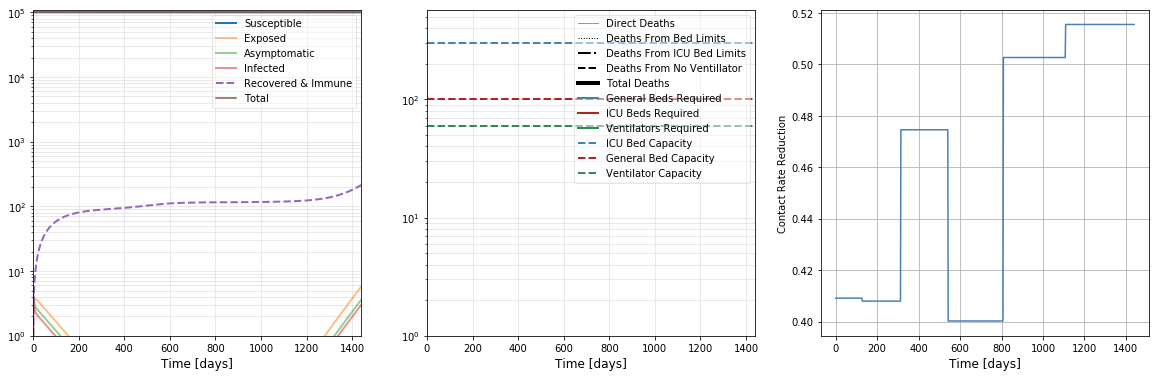

In [29]:
optimizer.plot_optimal_model()

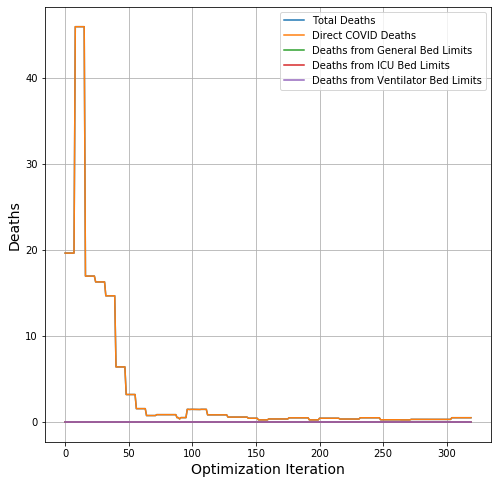

In [30]:
optimizer.plot_loss()